# Iris Classification Project

## import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [2]:
from sklearn.datasets import load_iris
dataset = load_iris()
X = dataset.data[:, :2]
y = dataset.target

In [8]:
df = pd.DataFrame(dataset.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
df['Target'] = y
df.head(20)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [10]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
pd.DataFrame(X).head(20)

,0,1
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
5,5.4,3.9
6,4.6,3.4
7,5.0,3.4
8,4.4,2.9
9,4.9,3.1


In [13]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
print(dataset.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [15]:
print(dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [17]:
df.shape

(150, 5)

## Data Visualization

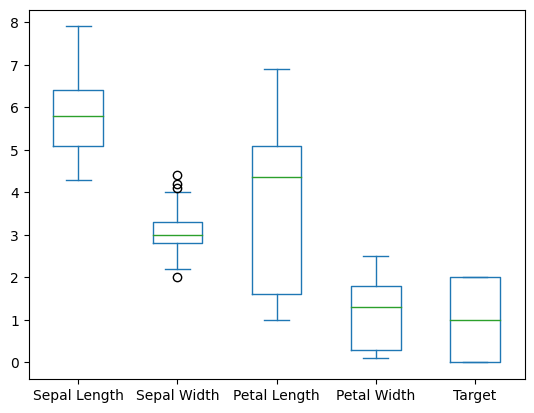

In [24]:
df.plot(kind='box', sharex=False, sharey=False)
plt.show()

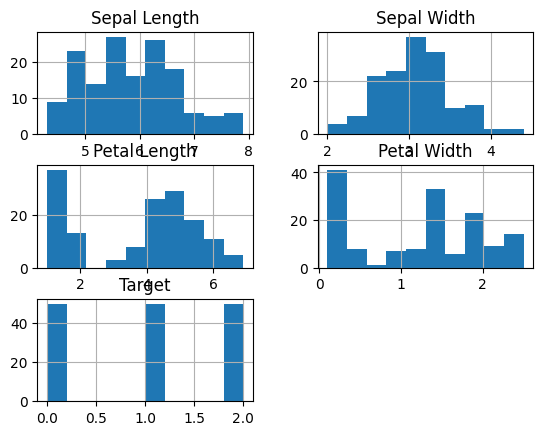

In [25]:
df.hist()
plt.show()

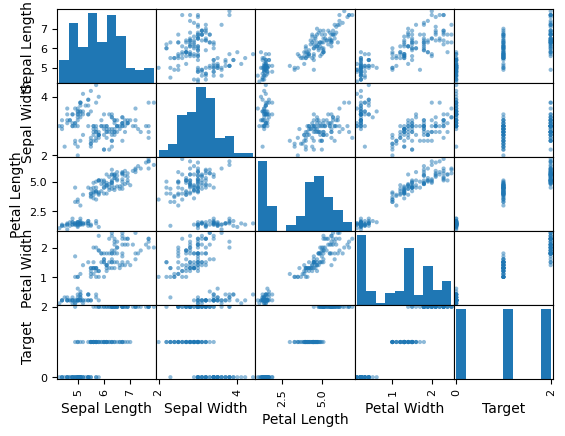

In [29]:
pd.plotting.scatter_matrix(df)
plt.show()

## Spilting dataset into traing set and test set

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## Training the model

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

names = []
models = []
results = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %.2f (%f)' % (name, cv_results.mean() * 100, cv_results.std()))


LR: 75.00 (0.091287)
LDA: 77.50 (0.112114)
KNN: 74.17 (0.131498)
CART: 65.83 (0.058333)
NB: 76.67 (0.116667)
SVM: 75.00 (0.098601)


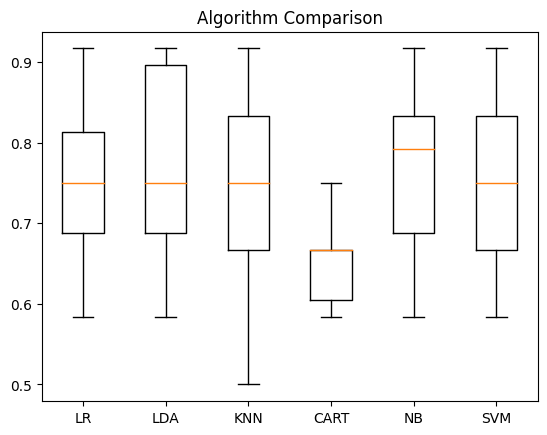

In [37]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [38]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

## Predicting the model

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = model.predict(X_test)

print("Accuracy Score: {} %".format(accuracy_score(y_test, predictions) * 100))
print("Confusion Matrix: {} %".format(confusion_matrix(y_test, predictions) * 100))
# print("Classification Report: {} %".format(classification_report(y_test, predictions) * 100))

Accuracy Score: 90.0 %
Confusion Matrix: [[1000    0    0]
 [   0  700  200]
 [   0  100 1000]] %


## Visualization

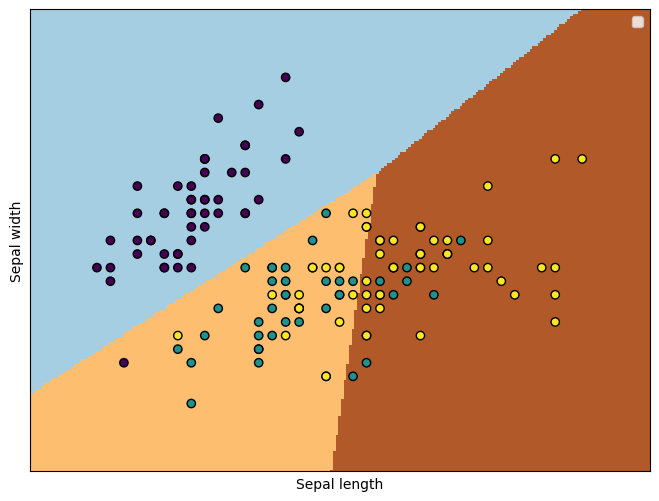

In [50]:
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for the mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.viridis)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend()

plt.show()

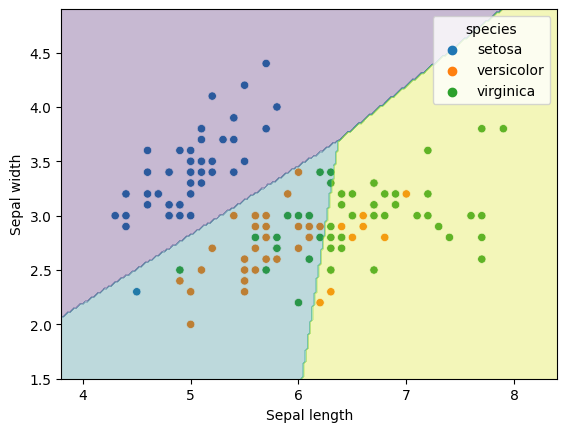

In [51]:
# Define the mesh grid for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for the mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a dataframe of the input data and predicted labels
df = sns.load_dataset("iris").iloc[:, :2]
df['species'] = dataset.target_names[y]
df['predicted_species'] = dataset.target_names[model.predict(X)]

# Plot the data points and decision boundary using Seaborn and Matplotlib
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

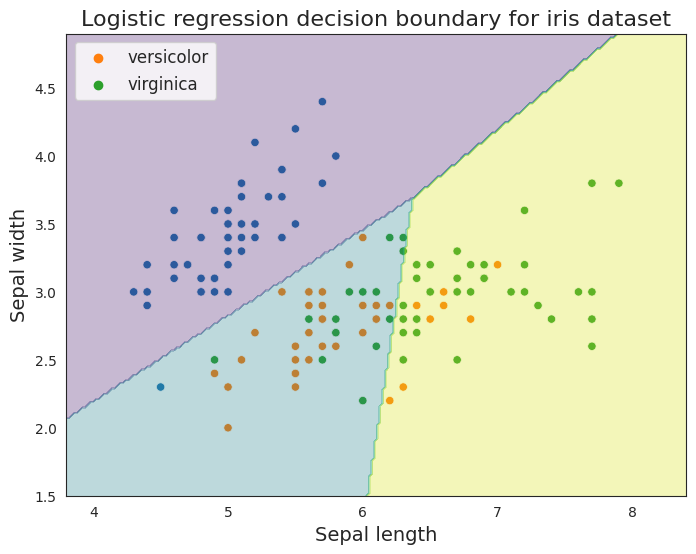

In [52]:
# Define the mesh grid for plotting
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class labels for the mesh grid points
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a dataframe of the input data and predicted labels
df = sns.load_dataset("iris").iloc[:, :2]
df['species'] = dataset.target_names[y]
df['predicted_species'] = dataset.target_names[model.predict(X)]

# Set Seaborn style and create figure and axes objects
sns.set_style("white")
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points and decision boundary using Seaborn and Matplotlib
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species', ax=ax)
ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.viridis)
ax.set_xlabel('Sepal length', fontsize=14)
ax.set_ylabel('Sepal width', fontsize=14)
ax.set_title('Logistic regression decision boundary for iris dataset', fontsize=16)

# Add a legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[1:], labels=labels[1:], loc='upper left', fontsize=12)

plt.show()